# FSU Machine Learning Seminar - Classification and Clustering in Python

In this notebook, we will show how to put some of the theory we've been learning about into practice.

This lesson is written in a "Jupyter notebook", which is a useful way to organize and present Python code. Each of the cells containing code could be evaluated in a command line enviroment as well---this is the real Python code.

To evaluate a cell, hold Shift and press Return.

To create a new cell, highlight a cell by clicking on the left of it, then type "a" or "b" for "above" or "below", respectively. You can also use the "+" button in the menu bar.

To delete a cell, highlight it and press "d" twice in succession. 

To create a cell for text rather than code (such as this one), create a cell then switch it to "Markdown" mode in the dropdown above. You can also highlight the cell and type "m".

## (Extremely) Basic Python

Evaluate the following cells.

In [7]:
2+3

5

In [8]:
2*3

6

In [9]:
2^3

1

In [10]:
0^0

0

In [11]:
1^0

1

In [12]:
1^1

0

In [13]:
2**3

8

In [14]:
cat+dog

cat: +dog: No such file or directory


In [15]:
'cat'+'dog'

'catdog'

# Classification

## Motivating Example - Iris Dataset

The `iris` dataset is a famous dataset used in examples. It contains biological measurements for samples of a few different flower species. 

We can import this dataset through a Python package called `seaborn`. In Python programming, you use a lot of packages that people have already built. You will need to install some of them. I recommend installing a data science platform like `Anaconda`; this will automatically install a bunch of useful data science Python packages.

Packages are loaded by the `import` command, and can be loaded with abbreviations to make your code clearner.

In [2]:
import seaborn as sns # sns is the standard abbreviation for seaborn

iris = sns.load_dataset("iris")

The dataset loads as something called a "dataframe". This is like a fancy spreadsheet with useful commands for exploring and subsetting the data.

Let's take a look at it:

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Each record has four mearements or "features" and a label. This means that we can use our machine learning techniques to train a classifier.

The dataset contains flowers from three different species, as we can see below. This means that the labels for this data naturally fall into three categories, say, $\{0,1,2\}$. 

In [4]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

If we create a scatterplot for the features, we see that the data is pretty well-separated by label.

The code is calling the `scatterplot` function from the package `seaborn`, which we abbreviated as `sns`. The input data to the `scatterplot` function is making use of the dataframe structure of the `iris` data.

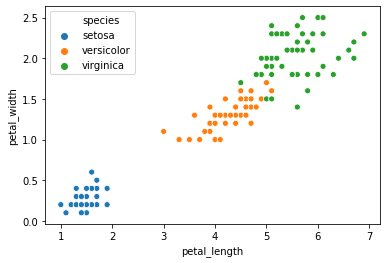

In [5]:
sns.scatterplot(x="petal_length", y="petal_width",
                hue="species", data=iris)

## Logistic Regression

*Logistic regression* is a regression algorithm on data consisting of
- A set of feature vectors $X = \{\vec{x}_1,\ldots,\vec{x}_n\}$, each $\vec{x}_j \in \mathbb{R}^d$
- A set of labels $Y = \{y_1,\ldots,y_n\}$, each $y_j \in \{0,1\}$. 
The goal is to find a function $f:\mathbb{R}^d \rightarrow [0,1]$ such that $f(\vec{x})$ predicts the probability that a feature vector $\vec{x}$ should be labeled $1$. 

The regression problem is solve by finding weights $\beta_1,\ldots, \beta_d, b$ minimizing the loss function
$$
L(\beta_1,\ldots,\beta_d,b) = -\frac{1}{n} \sum_j \big[y_j \log(f(\vec{x}_j)) + (1-y_j)\log(1-f(\vec{x}_j)) \big],
$$
where $f(\vec{x}) = S(g(\vec{x}))$, with $g$ the linear function
$$
g(\vec{x}) = \beta_1 x^1 + \cdots + \beta_d x^d + b
$$
and $S$ the *sigmoid function* (or *logistic function*)
$$
S(a) = \frac{1}{1 + \exp(-a)}.
$$
This optimal collection of weights is found via gradient descent, or some variant of it.

### Increasing the Number of Labels

Now suppose we have data of the form
- A set of feature vectors $X = \{\vec{x}_1,\ldots,\vec{x}_n\}$, each $\vec{x}_j \in \mathbb{R}^d$
- A set of labels $Y = \{y_1,\ldots,y_n\}$, each $y_j \in \{0,1,\ldots,K\}$, $K \geq 1$. I.e., now there are $K+1$ labels that we would like to predict!

The goal is now to find a function 
$$
f:\mathbb{R}^d \rightarrow [0,1] \times [0,1] \cdots \times [0,1],
$$
where the range has $K+1$ copies of the interval $[0,1]$. Moreover, we want the output to be a *probability vector*. That is, if $f(\vec{x}) = \vec{p}$, with $\vec{p} = (p^0,p^1,\ldots, p^K)$ satisfying
$$
\sum_{j=0}^K p^j = 1.
$$
We could use such a function to label feature vectors via the rule
$$
\mathrm{label}(\vec{x}) = \mathrm{argmax}_j \{p_j\},
$$
i.e., the feature recieves the label with the highest probability.

### Formulating an Algorithm: SoftMax Regression

The precise statement of the problem falls into a familiar paradigm: we want to fix a class of relevant predictor functions, parameterized by some weights, then minimize a loss function on those weights. This is done by a rather direct generalization of the logistic regression formulation.

We now have a collection of weights for each label. Denote the weights for label $j$ by $\beta^{(j)}_1, \ldots, \beta^{(j)}_d, b^{(j)}$. For each label $j$, we then get a linear function $g^{(j)}$ defined on $\vec{x} = (x^1,\ldots,x^d)$ by
$$
g^{(j)}(\vec{x}) = \beta^{(j)}_1 x^1 + \cdots + \beta^{(j)}_d x^d + b^{(j)}.
$$
Finally, we define 
$$
p^j(\vec{x}) = \frac{\exp(g^{(j)}(\vec{x}))}{\sum_{\ell=0}^K \exp(g^{(\ell)}(\vec{x}))}.
$$
Note that $p^j(\vec{x}) \in [0,1]$. We interpret this as the probability that $\vec{x}$ has label $j$. Our prediction function is then given by
$$
f(\vec{x}) = \vec{p}(\vec{x}) = \left(p^0(\vec{x}),p^1(\vec{x}),\ldots,p^K(\vec{x})\right).
$$

Let $B$ denote the collection of all $\beta^{(j)}_\ell$ (so $B$ contains $d\cdot K$ weights) and let
$$
b = (b^{(0)},\ldots,b^{(K)})
$$
denote the vector of offsets (sometimes called *biases*). We seek to optimize the following loss function
$$
L(B,b) = -\frac{1}{n} \sum_{j=1}^n \sum_{\ell = 0}^K \delta_{j\ell} \log(p^\ell(\vec{x}_j)),
$$
where
$$
\delta_{j\ell} = \left\{\begin{array}{cc}
1 & y_j = \ell \\
0 & \mbox{otherwise.} \end{array}\right.
$$
This loss function $L$ is sometimes called the *cross entropy function*.

### Theoretical Homework

Check that this reduces to the standard logistic regression problem when the labels are $\{0,1\}$.

### Solving the Regression Problem

The cross entropy function is a differentiable function $L:\mathbb{R}^{dK + K} \rightarrow \mathbb{R}$. It is convex and therefore has a unique minimum. However, it is not possible to solve for the minimum analytically. Luckily, one can compute the gradient $\nabla L$ explicitly and we can therefore minimize the loss via gradient descent (or some variant thereof). We will use built-in functions from the package `scikit-learn`, rather than coding this gradient descent by hand.

## SoftMax Regression on the Iris Dataset

Let's train and test a model to classify all 3 flower species in the `iris` dataset.

We will use the popular Machine Learning Python package `scikit-learn`. We will import certain functions from the package, rather than the whole package as we did for `seaborn`.

We'll also use the package `matplotlib.pyplot` for plotting things. This is another very popular package.

In [16]:
# Import some useful functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Let's get our data. The explanatory variables are 'petal_length' and 'petal_width' (so there are two features, and each element of our set $X$ is a vector in $\mathbb{R}^2$). We also need to get the set $y$ consisting of labels for all of the flower species. The `scikit-learn` package has a built-in function to take a vector of 'categorical variables' (i.e., labels) and turn it into a vector of integers.

In [17]:
X = iris[['petal_length','petal_width']] #'Subsetting' the dataframe to take two of the features.

In [18]:
y = iris.species.astype("category").cat.codes # Extracting labels as 0,1,2

Let's make sure that the last function did the right thing by plotting. We use the function `plot` from the package `matplotlib.pyplot`, which we abbreviated as `plt`.

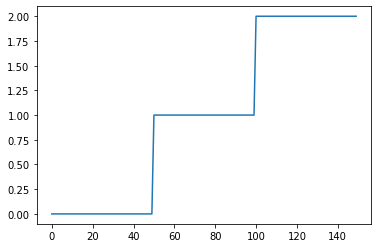

In [20]:
# Plotting the label vector shows that we have correctly labelled things as 0,1,2
plt.plot(y)

To test the performance of logistic regression for this classification problem, we will split our data into a 'testing set' and a 'training set'. 

We imported a function from `scikit-learn` which does this.

In [21]:
# Construct the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Check the sizes of the sets
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(112, 2)
(38, 2)
112
38


So we've pulled off 112 feature vectors and their labels. This is the "training set". This will be used to train the model. We can then test its performance on the data which was left out. This is the "testing set".

Now we will fit the logistic regression model to our training data. Notice that we have to specify a `multi_class` option (otherwise we will get a warning). The `multinomial` option uses the cross entropy function, as described above. 

In [22]:
model = LogisticRegression(solver='lbfgs', multi_class = 'multinomial', max_iter=10000) # Choose a model
model.fit(X_train, y_train) # Train the model on our "training set"

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The weight coefficients $\beta^{(j)}_\ell$ and $b^{(j)}$ are given below. There should be 
$$
dK + K = 2\cdot 3 + 3 = 9
$$
numbers in total.

In [23]:
model.coef_, model.intercept_

(array([[-2.53497386, -1.02624743],
        [ 0.10855954, -0.81556404],
        [ 2.42641431,  1.84181147]]),
 array([ 10.12484865,   2.69393459, -12.81878324]))

So our probability functions are defined for $j=0,1,2$ by
$$
p^j(\vec{x}) = \frac{\exp(g^{(j)}(\vec{x}))}{\sum_{\ell=0}^K g^{(\ell)}(\vec{x})},
$$
with
\begin{align*}
g^{(0)}(\vec{x}) &= -2.535 x^1 - 1.026 x^2 + 10.125 \\
g^{(1)}(\vec{x}) &= 0.10855954 x^1 -0.81556404 x^2 + 2.69393459\\
g^{(2)}(\vec{x}) &= 2.42641431 x^1 +  1.84181147 x^2 -12.81878324
\end{align*}

Let's take a look at how these probability functions evaluate on some subset of our testing data.

In [24]:
print(X_test[0:5])
print(y_test[0:5])

     petal_length  petal_width
14            1.2          0.2
98            3.0          1.1
75            4.4          1.4
16            1.3          0.4
131           6.4          2.0
14     0
98     1
75     1
16     0
131    2
dtype: int8


In [25]:
model.predict_proba(X_test[0:5])

array([[9.85464688e-01, 1.45352392e-02, 7.31322573e-08],
       [3.24098804e-01, 6.73498850e-01, 2.40234616e-03],
       [9.18888507e-03, 8.23517051e-01, 1.67294064e-01],
       [9.80353933e-01, 1.96458551e-02, 2.12049664e-07],
       [4.77349241e-07, 9.60039561e-03, 9.90399127e-01]])

In [26]:
for j in range(5):
    print('Sum of row:', sum(model.predict_proba(X_test[0:5])[j]))

Sum of row: 0.9999999999999999
Sum of row: 1.0
Sum of row: 0.9999999999999999
Sum of row: 1.0
Sum of row: 1.0


Each row above gives the three probabilities that the correct label is 0, 1 or 2, respectively. If we take the max in each row, then the predicted labels agree with the true ones! Indeed, this can be done with a single command.

In [27]:
model.predict(X_test[0:5])

array([0, 1, 1, 0, 2], dtype=int8)

So our model mades some correct predictions! We can plot each of the probability functions over the full data set. 

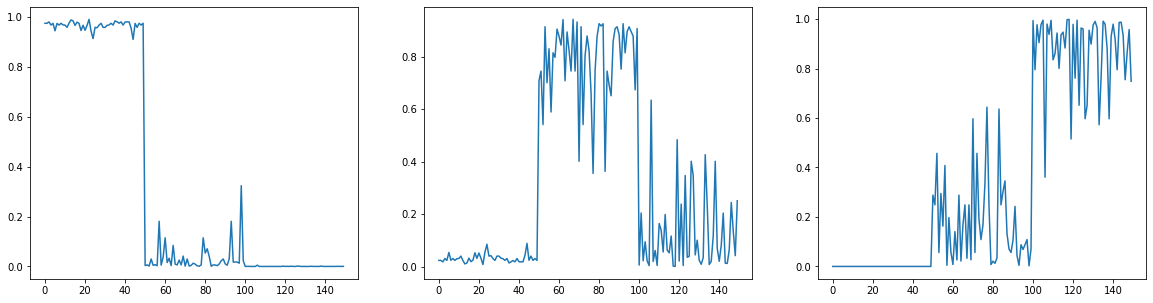

In [28]:
fig = plt.figure(figsize=(20,5))

for j in range(3):
    fig.add_subplot(1,3,j+1)
    plt.plot(model.predict_proba(X)[:,j])

plt.show()

This looks like a pretty convincing split between the flower species. Some observations:
- In the function on the left, everything in class 2 has essentially zero probability of being labelled as class 0
- For the function in the middle and one the right, there is a very low probability of assigning the label 0
- For the function in the middle (probability that the label is 1), there are several things with true label 2, but which have high values.

The model still performs really well in the classification task, but not perfectly, as we see by the following scores.

In [29]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9732142857142857
0.9736842105263158


To see what was predicted correctly/incorrectly, we can look at the *confusion matrix*. For a general multiclass classification problem with labels $0,1,\ldots,K$, the confusion matrix is the $(K+1) \times (K+1)$ matrix
$$
C = (C_{ij}) = \left(\begin{array}{cccc}
C_{00} & C_{01} & \cdots & C_{0K} \\
C_{10} & C_{11} & \cdots & C_{1K} \\
\vdots & \vdots & & \vdots \\
C_{K0} & C_{K1} & \cdots & C_{KK} \end{array}\right)
$$
with entry $C_{ij}$ giving the number of observations known to be in group $i$ and predicted to be in group $j$.

This can be computed via `scikit-learn` as follows.

In [30]:
from sklearn import metrics
predicted = model.predict(X_test)
metrics.classification_report(y_test, predicted)
print(metrics.confusion_matrix(y_test, predicted))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


This shows that in the test set almost everything was classified correctly, except one flower with true label 1 was predicted to have label 2. 

We can similarly compute the confusion matrix on the training set.

In [31]:
predicted = model.predict(X_train)
metrics.classification_report(y_train, predicted)
print(metrics.confusion_matrix(y_train, predicted))

[[37  0  0]
 [ 0 32  2]
 [ 0  1 40]]


### Exercise

Rerun the above experiments using features `sepal_length` and `sepal_width`. Before fitting the model, plot the data. Do you expect better or worse classification results? 

## Synthetic Data

In order to get a feel for how various ML algorithms work, it is extremely beneficial to play around with toy data. 

The code below generates some toy data. You can play with the various parameters in the `make_blobs` function until you get something that looks interesting.

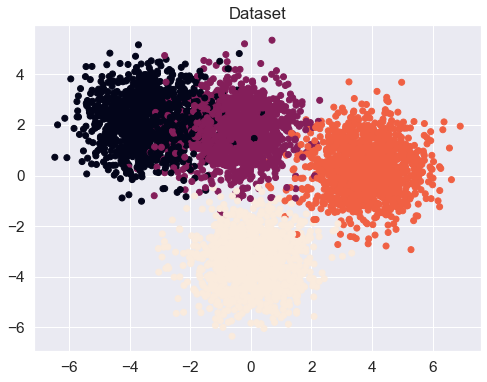

In [56]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, n_samples = 5000, center_box = [-4,4], random_state=7)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.show()

Now we can run through the same model training/testing process as we did above. 

In [54]:
# Construct the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Check the sizes of the sets
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

model = LogisticRegression(solver='lbfgs', multi_class = 'multinomial', max_iter=10000)
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

(3750, 2)
(1250, 2)
3750
1250
0.9541333333333334
0.9592


The code below visualizes the performance of the logistic regression classification model.

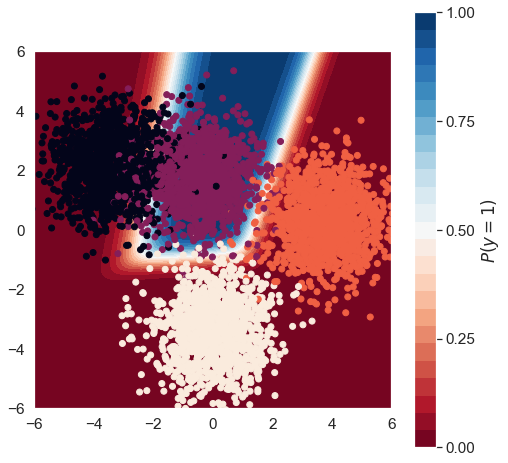

In [60]:
import numpy as np
label = 1 # Change this parameter to change the plot.

xx, yy = np.mgrid[-6:6:.01, -6:6:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, label].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:,1], c=y)

ax.set(aspect="equal",
       xlim=(-6, 6), ylim=(-6, 6));

### Homework

Rerun the above experiment after playing around with the various parameters in the toy data generator. 

## The MNIST dataset



The `scikit-learn` package includes a collection of toy
datasets, including the ever-popular MNIST database (Modified
National Institute of Standards and Technology database), a database
of handwritten digits. MNIST is used as a standard testing ground and benchmark when studying machine learning algorithms. 

The data is highly preprocessed to center the
handwritten digits, threshold the bitmaps, etc. This particular version of MNIST is smaller than the full version that you see used as a benchmark in ML papers.


In [61]:
from sklearn import datasets
digits = datasets.load_digits()

In [62]:
type(digits)

sklearn.utils.Bunch

'Bunch' is a dictionary-type object. Let's take a look at what is in there.

In [63]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

The images are available under `digits.images`. The labels of the digits are in `digits.target`.



In [64]:
images = digits.images
print(type(images))
print(images.shape)

<class 'numpy.ndarray'>
(1797, 8, 8)


In [65]:
target = digits.target
target[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Each image is an $8 \times 8$ array of numbers between 0 and 16,
inclusive.  Let's take a look at the first few examples.

Note that image generation can be done in a `for` loop in Python.


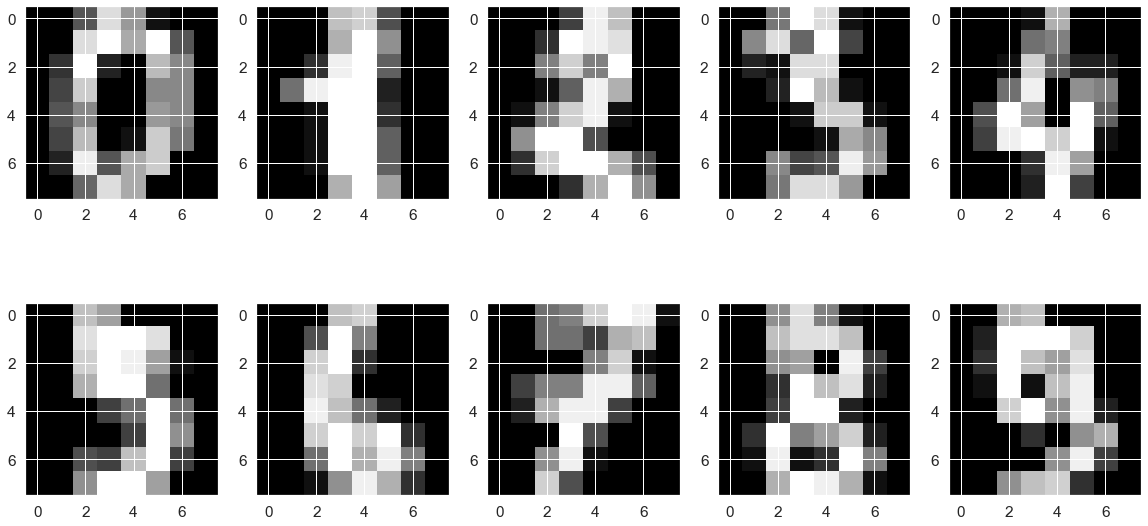

In [66]:
fig = plt.figure(figsize=(20,10))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.imshow(digits.images[j], cmap='gray')
    # imshow is a useful function. 
    # It treats an array of numbers as an image, with the number in each entry 
    # corresponding to a color.

We can blur the pixels a bit to get better looking pictures.

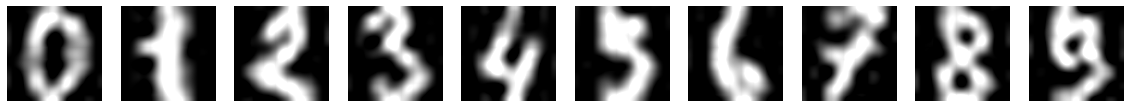

In [68]:
fig = plt.figure(figsize=(20,10))

for j in range(10):
    fig.add_subplot(1,10,j+1)
    plt.imshow(digits.images[j], cmap='gray', interpolation = 'sinc')
    plt.axis('off')
    # Using different display options than what we used previously

We can treat each image as a vector in $\mathbb{R}^{8 \times 8} \approx \mathbb{R}^{64}$. Conveniently, `digits.data` reshapes each image into a 64 dimensional vector.

In [38]:
print(digits.data[0])
print(images[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


### Classification

Now let's create a logistic regression model to classify digits in the MNIST dataset, fit the model to a training set, then test it on a testing set. We will also compute the classification rates and the confusion matrix.

In [69]:
from sklearn.model_selection import train_test_split 

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
model = LogisticRegression(solver='lbfgs', multi_class = 'multinomial', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
print(model.score(X_train,y_train))
logistic_regression_score = model.score(X_test,y_test)
print(logistic_regression_score)

1.0
0.9533333333333334


In [72]:
from sklearn import metrics
predicted = model.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


The following gives a fancy plot of the confusion matrix.

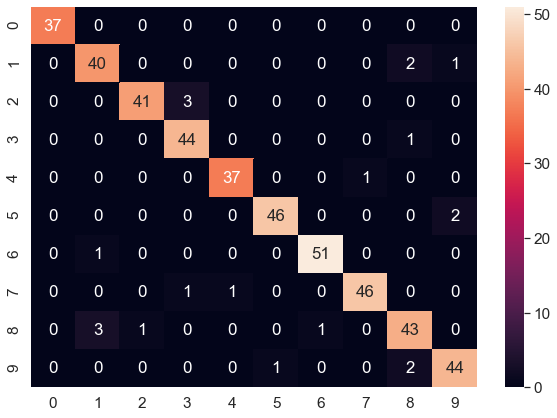

In [75]:
import pandas as pd

array = metrics.confusion_matrix(y_test, predicted)

df_cm = pd.DataFrame(array, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True)

## Examining the Coefficients

Once the classification model has been created, we have a list of coefficients for each label. Let's try to visualize what those coefficients are telling us about our data.

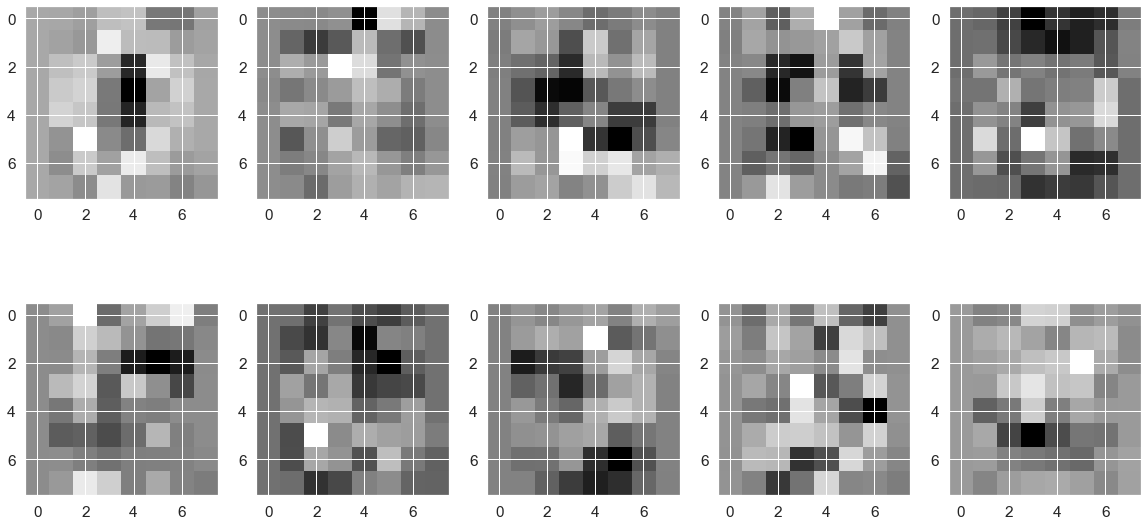

In [45]:
fig = plt.figure(figsize=(20,10))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.imshow(model.coef_[j].reshape(8,8), cmap='gray')

# Other Classification Models

There are many classification models built into `scikit-learn`. We have studies some of these and not others, but the procedure for splitting into training/testing sets, training the models and testing performance is basically the same in each case.

### Support Vector Machines

In [80]:
from sklearn.svm import SVC
modelSVM = SVC(kernel="linear",C=1)
# C is a regularization parameter. The default is C=1, so this is not necessary to include. It is here for demonstration.
modelSVM.fit(X_train, y_train)

SVM_score = modelSVM.score(X_test,y_test)

In [81]:
print('Logistic Regression Score: ',logistic_regression_score)
print('Support Vector Machine Score: ',SVM_score)

Logistic Regression Score:  0.9533333333333334
Support Vector Machine Score:  0.9711111111111111


### $k$-Nearest Neighbors

Another extremely simple supervised classification technique is called *$k$-Nearest Neighbors*. To determine the class of a vector $\vec{x}$, we look at the $k$ nearest points in the training data with respect to, say, Euclidean distance. The most common label amongst those is neighbors is then assigned to $\vec{x}$.

Let's try it on MNIST.

In [82]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

kNN_score = knn.score(X_test, y_test)

In [83]:
print('Logistic Regression Score: ',logistic_regression_score)
print('Support Vector Machine Score: ',SVM_score)
print('5-Nearest Neighbors Score: ',kNN_score)

Logistic Regression Score:  0.9533333333333334
Support Vector Machine Score:  0.9711111111111111
5-Nearest Neighbors Score:  0.98


Remarks:
- This simple method does even better than logistic regression or SVM! In general, comparative performance of the models will depend on the application (i.e., kNN does worse than LR on some data).

- The fitting essentially takes no time, because all
`fit` does is store all the training data.  This results in &ldquo;large&rdquo;
models that require quite a bit memory.  

- For large datasets, `predict` is slow
if there are many points, because it is costly to search for nearby
neighbors.

- $k$-NN can also run into problems for high-dimensional data, due to the "Curse of Dimensionality" https://en.wikipedia.org/wiki/Curse_of_dimensionality

Another interesting thing about $k$-NN classification is that it doesn't actually require knowledge of the **vectors**, just the **distances** between them. This means that $k$-NN is well-defined in general metric spaces which may not be vector spaces. 

Some alternative metrics on $\mathbb{R}^d$ are built in to `scikit-learn`. A list of them is available here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

### Exercise

Experiment with $k$-NN classification of MNIST by changing the parameters. In particular:

1) What happens if you change the number of neighbors? Make a plot of the classification rate over various values of $k$. 

2) Try some other metrics on $\mathbb{R}^{64}$. Which metric does the *best* job? Which metric does the *worst* job?

### Simple Neural Network: Multi-Layer Perceptron

There are lots of parameters to experiment with here. The following choice gives the best results that I found, but I didn't mess with it for too long. See the documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html.

In [122]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(20, 20), random_state=1)

mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [123]:
mlp_score = mlp.score(X_test, y_test)

In [124]:
print('Logistic Regression Score: ',logistic_regression_score)
print('Support Vector Machine Score: ',SVM_score)
print('5-Nearest Neighbors Score: ',kNN_score)
print('Multi-Layer Perceptron Score:', mlp_score)

Logistic Regression Score:  0.9533333333333334
Support Vector Machine Score:  0.9711111111111111
5-Nearest Neighbors Score:  0.98
Multi-Layer Perceptron Score: 0.96


### Homework

The `fashion-mnist` is another interesting dataset for image classification. It contains preprocessed pictures of clothing items from 10 classes together with labels. The code below reads in and displays part of the `fashion-mnist` dataset. Explore this dataset and find which classification algorithm gives the best performance on it.

**Note:** You will have to figure out how to get the data into an appropriate form to train the models. 

**Note:** This dataset is a lot bigger than what we have been using. The training steps may take a while!

In [87]:
import pandas as pd
import math
# Load the data.
data = pd.read_csv('fashion-mnist-demo.csv')

# Create the mapping between numeric category and category name.
label_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

# Print the data table.
data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


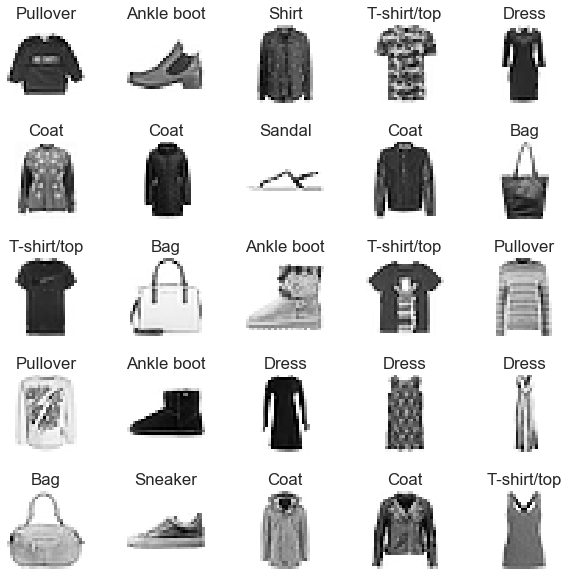

In [91]:
# Choose a number of images to display. Should be a perfect square to make the display look good.
numbers_to_display = 25

# Calculate the number of cells that will hold all the images.
grid_size = int(np.sqrt(numbers_to_display))

plt.figure(figsize=(10, 10))

# Go through the first images in a training set and plot them.
for plot_index in range(numbers_to_display):
    # Extrace image data.
    digit = data[plot_index:plot_index + 1].values
    digit_label = digit[0][0]
    digit_pixels = digit[0][1:]

    # Calculate image size (remember that each picture has square proportions).
    image_size = int(np.sqrt(digit_pixels.shape[0]))
    
    # Convert image vector into the matrix of pixels.
    frame = digit_pixels.reshape((image_size, image_size))
    
    # Plot the image matrix.
    plt.subplot(grid_size, grid_size, plot_index + 1)
    plt.imshow(frame, cmap='Greys')
    plt.title(label_map[digit_label])
    plt.axis('off')

# Plot all subplots.
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Homework

Preprocess the data a bit until it is the correct form. Then train some classifiers and test their performance. What kind of results do you get?

# Clustering

An important task in "unsupervised learning" is to *cluster* data. That is, we wish to find groupings of similar data without any knowledge of 'ground truth' labels. Let's explore some methods for doing this.

## $k$-Means Clustering

Suppose that we have a point cloud of data $X = \{\vec{x}_1,\ldots,\vec{x}_N\}$ with each $\vec{x}_j \in \mathbb{R}^d$. Our goal is to divide $X$ into $k$ clusters, where $k$ is some positive integer we choose ahead of time. 

As usual, let's construct some toy data to experiment with.

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

K = 2 # classes
N = 100 # in each class
dimension = 2
X, y = make_blobs(n_samples=N*K, centers=K, n_features=dimension, random_state=12)

plt.scatter(X[:,0],X[:,1]);

We can see visually that our data roughly lies in two clusters. Moreover, we have 'ground truth' labels.

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y);

For the sake of illustration, suppose we have no labels and that our data lives in a high dimension that we can't plot.

The goal is to *partition* $X$ into $\{S_1,\ldots,S_k\}$ disjoint nonempty subsets $S_j \subset X$. Let $\mu_j$ denote the mean of the points in $S_j$; these are called *cluster centers* in this context. We want our partition to minimize the quantity
$$
\sum_{j=1}^k \sum_{\vec{x} \in S_j} \|\vec{x} - \mu_j\|^2.
$$

The idea is that the winning partition has the data clustered as tightly as possible around the $k$ means (hence the name of the algorithm). 

It is not possible to solve for this partition explicitly, so we will search for it iteratively.

Let's write code to compute the $k$-means clustering partition. 

**Spoiler:** This function is built into `scikit-learn`. The point is to build the algorithm ourselves first to understand how it works.

### The $k$-Means Clustering Algorithm

When writing our algorithm, we'll take the opportunity to demonstrate some more useful `numpy` tricks. These will be pointed out as we go along.

In [ ]:
# Import numpy
import numpy as np

#### Step 1: Initialize with Random Cluster Centers

A useful function for this task is `np.random.choice`.

In [ ]:
# Example
np.random.choice(10,3)

In [ ]:
def cluster_centers(X,K):
    return X[np.random.choice(len(X),size=K)]
    # Pull out entries of X given by the random choice of K indices

# Testing
print(cluster_centers(X,2))
print(cluster_centers(X,2))
print(cluster_centers(X,3))

#### Step 2:  Determine Clusters

For each point in $X$, we figure out which cluster center is nearest to it. 

We will employ a useful trick called *numpy broadcasting*. If we apply arithmetic operations to `numpy` arrays of incompatible sizes, numpy broadcasting will make sense of this by 'broadcasting' the smaller array over the larger one. This only works under certain conditions on the sizes, so we have to put some thought into setting it up.

In [ ]:
# Define arrays to test on
A = np.array([[1,2]])
B = np.array([[0,0],[1,1],[2,2]])

It doesn't make sense mathematical to add these different-sized if we think of them as matrices. On the other hand, `numpy` interprets addition as: 'add the row of `A` to *each* row of `B`.

In [ ]:
# It doesn't make sense to add these arrays mathematically
A + B

We can get even trickier by employing the `np.newaxis` function which takes a 1D array to a 2D array, a 2D array to a 3D array, etc. The way that the function affects the array depends on which 'slot' we use it in.

In [ ]:
# Define a new test array
C = np.array([[1,2],[3,4]])
Cnew = C[:,np.newaxis,:]
print(Cnew.shape)
Cnew

The following gives an error. To see the general rules for broadcasting, check here: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [ ]:
B+C

On the other hand, our reshaped array `Cnew` follows the rules to be broadcast with `B`.

In [ ]:
print((B+Cnew).shape)
B+Cnew

Now let's define our function. The input is the dataset `X` and a collection of cluster centers `centers` (e.g., the output of `cluster_centers(X,K)`). The output is an array indicating the index of the cluster center to which each element $\vec{x}_j$ of $X$ belongs.

In [ ]:
def closest(X, centers):
    distances = np.linalg.norm(X - centers[:, np.newaxis,:], axis=2)
    return np.argmin(distances, axis=0)

In [ ]:
# Testing
centers = cluster_centers(X,2)
closest(X,centers)

### Exercise 

Take a moment to dissect the code of the `closest` function. Try to undertand exactly what is going on with the broadcasting procedure.

In [183]:
centers

array([[-6.36068278,  5.02371339],
       [-6.71451223,  4.45115953]])

In [184]:
centers[:,np.newaxis,:]

array([[[-6.36068278,  5.02371339]],

       [[-6.71451223,  4.45115953]]])

In [186]:
(X - centers[:,np.newaxis,:]).shape

(2, 200, 2)

In [188]:
np.linalg.norm(X - centers[:, np.newaxis,:], axis=2).shape

(2, 200)

#### Step 3: Update Centers

Now we define an 'update' function. The input is our dataset `X` and a set of cluster centers `centers`. The output is a new collection of cluster centers, obtained by
- partitioning the data according to the input cluster centers,
- computing the mean within each cluster.

In [ ]:
def new_centers(X, centers):
    c = closest(X, centers)
    K = len(np.unique(c)) # Determine K by finding the number of labels in c
    return np.array([X[c==k].mean(axis=0) for k in range(K)])

In [ ]:
# Test
new_centers(X,centers)

#### Step 4: Iterate the procedure

We can now write our algorithm. We simply iterate the procedure above until the cluster center updates stop moving.

In [ ]:
def kMeans(X, K, max_iter = 10000):
    # Initializations
    centers = X[np.random.choice(len(X),size=K)]
    iteration = 0
    Delta = 1
    # While loop with a hard limit on number of iterations
    while Delta > .001 and iteration < max_iter:
        moved = new_centers(X,centers)
        Delta = np.linalg.norm( moved - centers )
        iteration = iteration+1
        centers = moved
    print('Iterations to converge: ', iteration)
    labels = closest(X,centers)
    # Output is a tuple
    return centers, labels

Let's test it on our data!

In [ ]:
centers, labels = kMeans(X,2)

In [ ]:
fig = plt.figure(figsize=(10,5))

p1 = fig.add_subplot(1,2,1)
p1.scatter(X[:,0],X[:,1],c=y)
plt.title('Ground Truth')

p2 = fig.add_subplot(1,2,2)
p2.scatter(X[:,0],X[:,1],c=1-labels) # Use 1-labels so the colors match up
p2.scatter(centers[:,0],centers[:,1], marker = '^', c = 'r')
plt.title('KMeans Algorithm')


Looks great! Of course, there is not reason that $k$-Means should perfectly replicate 'ground truth' labels if the data is not truly clustered. 

Some other issues:
- This is a randomly-initialized iterative algorithm and there is no guarantee that we find an absolute minimum!
- We knew that there should be 2 classes ahead of time. The $k$ in $k$-Means is chosen by the user, so it is definitely possible to make the 'wrong' choice.

In [ ]:
centers, labels = kMeans(X,4)

plt.scatter(X[:,0],X[:,1],c=labels) 
plt.scatter(centers[:,0],centers[:,1], marker = '^', c = 'r');

### Exercise

Try your $k$-Means algorithm on examples `X1` through `X4` below. For each example, try several values of $k$.

In [ ]:
X1, y1 = make_blobs(n_samples=500, center_box=(-3,3), centers=3, random_state=6)


X2, y2 = make_blobs(n_samples=1000, centers=4, random_state=1)

xs = np.linspace(0,2*np.pi,500)
X3 = np.array([np.cos(xs),np.sin(xs)]).T

from sklearn.datasets import make_circles
X4, y4 = make_circles(n_samples=500, noise = 0.02, random_state = 3)

fig = plt.figure(figsize=(10,10))

p1 = fig.add_subplot(2,2,1)
p1.scatter(X1[:,0],X1[:,1])
plt.title('Example 1')

p2 = fig.add_subplot(2,2,2)
p2.scatter(X2[:,0],X2[:,1])
plt.title('Example 2')

p3 = fig.add_subplot(2,2,3)
p3.scatter(X3[:,0],X3[:,1])
plt.title('Example 3');

p4 = fig.add_subplot(2,2,4)
p4.scatter(X4[:,0],X4[:,1])
plt.title('Example 4');

In [ ]:
A = X4

centers, labels = kMeans(A,2)

plt.scatter(A[:,0],A[:,1],c=labels) 
plt.scatter(centers[:,0],centers[:,1], marker = '^', c = 'r');

## $k$-Means with SciKit-Learn

As mentioned above, `scikit-learn` has $k$-Means Clustering capability, as well as several useful functions for analyzing the results.

Let's first try the `scikit-learn` implementation on our toy dataset.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X)

We can extract labels...

In [ ]:
kmeans.labels_

...and cluster centers.

In [ ]:
kmeans.cluster_centers_

These agree with our algorithm.

In [ ]:
centers, labels = kMeans(X,2)

In [ ]:
print(centers)
print(np.linalg.norm(labels - kmeans.labels_))
# Might need to switch to 1-labels above to see the correct result, since we initialize randomly

### $k$-Means on MNIST

Of course we need to try out the algorithm on MNIST!

In [ ]:
from sklearn.datasets import load_digits
MNIST, MNISTlabels = load_digits(return_X_y=True)
# The included option automatically gives us the vectors and labels

Let&rsquo;s cluster.



In [ ]:
kmeans = KMeans(n_clusters=3).fit(MNIST)

When the ground truth labels (namely `MNISTlabels`) are known, there are a variety of metrics that one can use to evaluate the quality of clustering. Let's use the "Adjusted Rand Index" (see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html). For this score, random labeling should give something close to 0, perfect labeling gives 1.

In [ ]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(MNISTlabels, kmeans.labels_)

This does a bad job. Of course, 3 clusters is not a good choice for MNIST.

### Exercise

Run $k$-Means clustering on MNIST for a range of choices for $k$, compute adjusted rand scores for each choice, then plot the results. What looks like the best choice for $k$? Does that agree with intuition?

In [ ]:
scores = []
for j in range(1,25):
    kmeans = KMeans(n_clusters=j).fit(MNIST)
    scores.append(adjusted_rand_score(MNISTlabels, kmeans.labels_))

plt.plot(list(range(1,25)),scores)

Let's take a look which digits are getting clustered together.

In [ ]:
kmeans = KMeans(n_clusters=10).fit(MNIST)

digit = 7 # Note: label 7 doesn't necessarily correspond to the digit 7. Label names are random!
images = MNIST[kmeans.labels_ == digit]

fig, axes = plt.subplots(10,10,figsize=(10,10))

for i in range(10):
    for j in range(10):
        axes[i,j].axis('off')
        axes[i,j].imshow(images[i * 10 + j].reshape(8,8),cmap='gray',interpolation='sinc')

plt.show()

## How Many Clusters?

Since we must choose a value of $k$ to run $k$-Means clustering, there is a big questions when doing *unsupervised learning* (i.e., we don't have 'ground truth' labels): what is the correct choice of $k$?

There is no *real* answer, but we can make an educated guess by looking at the *inertia* of the clustering. This is just the value of the function we were optimizing to begin with, evaulated on our clustering partition:
$$
\sum_{j=1}^k \sum_{\vec{x} \in S_j} \|\vec{x} - \mu_j\|^2.
$$

This is computed in `scikit-learn` as follows.

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
kmeans.inertia_

Let&rsquo;s plot this within-cluster sum-of-squares for the clusters computed via `KMeans` for multiple choices of `n_clusters`.



In [ ]:
plt.plot(list(range(1,10)), [KMeans(n_clusters=j).fit(X).inertia_ for j in range(1,10)] )
plt.show()

As we increase the number of clusters, the inertia will *always* decrease, so we are not looking for a local min. Instead, we look for an "elbow", where the slope of the intertia curve abruptly changes. If such an elbow appears, this is generally accepted to be an optimal number of clusters. For the dataset `X`, this tells us that the optimal number of clusters is 2, which should agree with our intuition.

### Exercise

Run this "elbow analysis" on examples `X1` through `X4` from above. Can you determine an optimal number of clusters in each case? What if you run the same sort of analysis on the MNIST dataset?

In [ ]:
plt.plot(list(range(1,10)), [KMeans(n_clusters=j).fit(X1).inertia_ for j in range(1,10)] )
plt.show()

In [ ]:
# Clustering

An important task in unsupervised learning is to *cluster* data. That is, we wish to find groupings of similar data without any knowledge of 'ground truth' labels. Let's explore some methods for doing this.

## $k$-Means Clustering

Suppose that we have a point cloud of data $X = \{\vec{x}_1,\ldots,\vec{x}_N\}$ with each $\vec{x}_j \in \mathbb{R}^d$. Our goal is to divide $X$ into $k$ clusters, where $k$ is some positive integer we choose ahead of time. 

As usual, let's construct some toy data to experiment with.

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

K = 2 # classes
N = 100 # in each class
dimension = 2
X, y = make_blobs(n_samples=N*K, centers=K, n_features=dimension, random_state=12)

plt.scatter(X[:,0],X[:,1]);

We can see visually that our data roughly lies in two clusters. Moreover, we have 'ground truth' labels.

plt.scatter(X[:,0],X[:,1],c=y);

For the sake of illustration, suppose we have no labels and that our data lives in a high dimension that we can't plot.

The goal is to *partition* $X$ into $\{S_1,\ldots,S_k\}$ disjoint nonempty subsets $S_j \subset X$. Let $\mu_j$ denote the mean of the points in $S_j$; these are called *cluster centers* in this context. We want our partition to minimize the quantity
$$
\sum_{j=1}^k \sum_{\vec{x} \in S_j} \|\vec{x} - \mu_j\|^2.
$$

The idea is that the winning partition has the data clustered as tightly as possible around the $k$ means (hence the name of the algorithm). 

It is not possible to solve for this partition explicitly, so we will search for it iteratively.

Let's write code to compute the $k$-means clustering partition. 

**Spoiler:** This function is built into `scikit-learn`. The point is to build the algorithm ourselves first to understand how it works.

### The $k$-Means Clustering Algorithm

When writing our algorithm, we'll take the opportunity to demonstrate some more useful `numpy` tricks. These will be pointed out as we go along.

# Import numpy
import numpy as np

#### Step 1: Initialize with Random Cluster Centers

A useful function for this task is `np.random.choice`.

# Example
np.random.choice(10,3)

def cluster_centers(X,K):
    return X[np.random.choice(len(X),size=K)]
    # Pull out entries of X given by the random choice of K indices

# Testing
print(cluster_centers(X,2))
print(cluster_centers(X,2))
print(cluster_centers(X,3))

#### Step 2:  Determine Clusters

For each point in $X$, we figure out which cluster center is nearest to it. 

We will employ a useful trick called *numpy broadcasting*. If we apply arithmetic operations to `numpy` arrays of incompatible sizes, numpy broadcasting will make sense of this by 'broadcasting' the smaller array over the larger one. This only works under certain conditions on the sizes, so we have to put some thought into setting it up.

# Define arrays to test on
A = np.array([[1,2]])
B = np.array([[0,0],[1,1],[2,2]])

It doesn't make sense mathematical to add these different-sized if we think of them as matrices. On the other hand, `numpy` interprets addition as: 'add the row of `A` to *each* row of `B`.

# It doesn't make sense to add these arrays mathematically
A + B

We can get even trickier by employing the `np.newaxis` function which takes a 1D array to a 2D array, a 2D array to a 3D array, etc. The way that the function affects the array depends on which 'slot' we use it in.

# Define a new test array
C = np.array([[1,2],[3,4]])
Cnew = C[:,np.newaxis,:]
print(Cnew.shape)
Cnew

The following gives an error. To see the general rules for broadcasting, check here: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

B+C

On the other hand, our reshaped array `Cnew` follows the rules to be broadcast with `B`.

print((B+Cnew).shape)
B+Cnew

Now let's define our function. The input is the dataset `X` and a collection of cluster centers `centers` (e.g., the output of `cluster_centers(X,K)`). The output is an array indicating the index of the cluster center to which each element $\vec{x}_j$ of $X$ belongs.

def closest(X, centers):
    distances = np.linalg.norm(X - centers[:, np.newaxis,:], axis=2)
    return np.argmin(distances, axis=0)

# Testing
centers = cluster_centers(X,2)
closest(X,centers)

### Exercise 

Take a moment to dissect the code of the `closest` function. Try to undertand exactly what is going on with the broadcasting procedure.

centers

centers[:,np.newaxis,:]

(X - centers[:,np.newaxis,:]).shape

np.linalg.norm(X - centers[:, np.newaxis,:], axis=2).shape

#### Step 3: Update Centers

Now we define an 'update' function. The input is our dataset `X` and a set of cluster centers `centers`. The output is a new collection of cluster centers, obtained by
- partitioning the data according to the input cluster centers,
- computing the mean within each cluster.

def new_centers(X, centers):
    c = closest(X, centers)
    K = len(np.unique(c)) # Determine K by finding the number of labels in c
    return np.array([X[c==k].mean(axis=0) for k in range(K)])

# Test
new_centers(X,centers)

#### Step 4: Iterate the procedure

We can now write our algorithm. We simply iterate the procedure above until the cluster center updates stop moving.

def kMeans(X, K, max_iter = 10000):
    # Initializations
    centers = X[np.random.choice(len(X),size=K)]
    iteration = 0
    Delta = 1
    # While loop with a hard limit on number of iterations
    while Delta > .001 and iteration < max_iter:
        moved = new_centers(X,centers)
        Delta = np.linalg.norm( moved - centers )
        iteration = iteration+1
        centers = moved
    print('Iterations to converge: ', iteration)
    labels = closest(X,centers)
    # Output is a tuple
    return centers, labels

Let's test it on our data!

centers, labels = kMeans(X,2)

fig = plt.figure(figsize=(10,5))

p1 = fig.add_subplot(1,2,1)
p1.scatter(X[:,0],X[:,1],c=y)
plt.title('Ground Truth')

p2 = fig.add_subplot(1,2,2)
p2.scatter(X[:,0],X[:,1],c=1-labels) # Use 1-labels so the colors match up
p2.scatter(centers[:,0],centers[:,1], marker = '^', c = 'r')
plt.title('KMeans Algorithm')


Looks great! Of course, there is not reason that $k$-Means should perfectly replicate 'ground truth' labels if the data is not truly clustered. 

Some other issues:
- This is a randomly-initialized iterative algorithm and there is no guarantee that we find an absolute minimum!
- We knew that there should be 2 classes ahead of time. The $k$ in $k$-Means is chosen by the user, so it is definitely possible to make the 'wrong' choice.

centers, labels = kMeans(X,4)

plt.scatter(X[:,0],X[:,1],c=labels) 
plt.scatter(centers[:,0],centers[:,1], marker = '^', c = 'r');

### Exercise

Try your $k$-Means algorithm on examples `X1` through `X4` below. For each example, try several values of $k$.

X1, y1 = make_blobs(n_samples=500, center_box=(-3,3), centers=3, random_state=6)


X2, y2 = make_blobs(n_samples=1000, centers=4, random_state=1)

xs = np.linspace(0,2*np.pi,500)
X3 = np.array([np.cos(xs),np.sin(xs)]).T

from sklearn.datasets import make_circles
X4, y4 = make_circles(n_samples=500, noise = 0.02, random_state = 3)

fig = plt.figure(figsize=(10,10))

p1 = fig.add_subplot(2,2,1)
p1.scatter(X1[:,0],X1[:,1])
plt.title('Example 1')

p2 = fig.add_subplot(2,2,2)
p2.scatter(X2[:,0],X2[:,1])
plt.title('Example 2')

p3 = fig.add_subplot(2,2,3)
p3.scatter(X3[:,0],X3[:,1])
plt.title('Example 3');

p4 = fig.add_subplot(2,2,4)
p4.scatter(X4[:,0],X4[:,1])
plt.title('Example 4');

A = X4

centers, labels = kMeans(A,2)

plt.scatter(A[:,0],A[:,1],c=labels) 
plt.scatter(centers[:,0],centers[:,1], marker = '^', c = 'r');

## $k$-Means with SciKit-Learn

As mentioned above, `scikit-learn` has $k$-Means Clustering capability, as well as several useful functions for analyzing the results.

Let's first try the `scikit-learn` implementation on our toy dataset.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X)

We can extract labels...

kmeans.labels_

...and cluster centers.

kmeans.cluster_centers_

These agree with our algorithm.

centers, labels = kMeans(X,2)

print(centers)
print(np.linalg.norm(labels - kmeans.labels_))
# Might need to switch to 1-labels above to see the correct result, since we initialize randomly

### $k$-Means on MNIST

Of course we need to try out the algorithm on MNIST!

from sklearn.datasets import load_digits
MNIST, MNISTlabels = load_digits(return_X_y=True)
# The included option automatically gives us the vectors and labels

Let&rsquo;s cluster.



kmeans = KMeans(n_clusters=3).fit(MNIST)

When the ground truth labels (namely `MNISTlabels`) are known, there are a variety of metrics that one can use to evaluate the quality of clustering. Let's use the "Adjusted Rand Index" (see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html). For this score, random labeling should give something close to 0, perfect labeling gives 1.

from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(MNISTlabels, kmeans.labels_)

This does a bad job. Of course, 3 clusters is not a good choice for MNIST.

### Exercise

Run $k$-Means clustering on MNIST for a range of choices for $k$, compute adjusted rand scores for each choice, then plot the results. What looks like the best choice for $k$? Does that agree with intuition?

scores = []
for j in range(1,25):
    kmeans = KMeans(n_clusters=j).fit(MNIST)
    scores.append(adjusted_rand_score(MNISTlabels, kmeans.labels_))

plt.plot(list(range(1,25)),scores)

Let's take a look which digits are getting clustered together.

kmeans = KMeans(n_clusters=10).fit(MNIST)

digit = 7 # Note: label 7 doesn't necessarily correspond to the digit 7. Label names are random!
images = MNIST[kmeans.labels_ == digit]

fig, axes = plt.subplots(10,10,figsize=(10,10))

for i in range(10):
    for j in range(10):
        axes[i,j].axis('off')
        axes[i,j].imshow(images[i * 10 + j].reshape(8,8),cmap='gray',interpolation='sinc')

plt.show()

## How Many Clusters?

Since we must choose a value of $k$ to run $k$-Means clustering, there is a big questions when doing *unsupervised learning* (i.e., we don't have 'ground truth' labels): what is the correct choice of $k$?

There is no *real* answer, but we can make an educated guess by looking at the *inertia* of the clustering. This is just the value of the function we were optimizing to begin with, evaulated on our clustering partition:
$$
\sum_{j=1}^k \sum_{\vec{x} \in S_j} \|\vec{x} - \mu_j\|^2.
$$

This is computed in `scikit-learn` as follows.

kmeans = KMeans(n_clusters=3).fit(X)
kmeans.inertia_

Let&rsquo;s plot this within-cluster sum-of-squares for the clusters computed via `KMeans` for multiple choices of `n_clusters`.



plt.plot(list(range(1,10)), [KMeans(n_clusters=j).fit(X).inertia_ for j in range(1,10)] )
plt.show()

As we increase the number of clusters, the inertia will *always* decrease, so we are not looking for a local min. Instead, we look for an "elbow", where the slope of the intertia curve abruptly changes. If such an elbow appears, this is generally accepted to be an optimal number of clusters. For the dataset `X`, this tells us that the optimal number of clusters is 2, which should agree with our intuition.

### Exercise

Run this "elbow analysis" on examples `X1` through `X4` from above. Can you determine an optimal number of clusters in each case? What if you run the same sort of analysis on the MNIST dataset?

plt.plot(list(range(1,10)), [KMeans(n_clusters=j).fit(X1).inertia_ for j in range(1,10)] )
plt.show()